In [16]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import json
import glob
import os
import tensorflow as tf
import pandas as pd

In [2]:
def pearson_tf(y_true, y_pred, axis=1):
    """Pearson correlation function implemented in tensorflow.

    Parameters
    ----------
    y_true: tf.Tensor
        Ground truth labels. Shape is (batch_size, time_steps, n_features)
    y_pred: tf.Tensor
        Predicted labels. Shape is (batch_size, time_steps, n_features)
    axis: int
        Axis along which to compute the pearson correlation. Default is 1.

    Returns
    -------
    tf.Tensor
        Pearson correlation.
        Shape is (batch_size, 1, n_features) if axis is 1.
    """
    # Compute the mean of the true and predicted values
    y_true_mean = tf.reduce_mean(y_true, axis=axis, keepdims=True)
    y_pred_mean = tf.reduce_mean(y_pred, axis=axis, keepdims=True)

    # Compute the numerator and denominator of the pearson correlation
    numerator = tf.reduce_sum(
        (y_true - y_true_mean) * (y_pred - y_pred_mean),
        axis=axis,
        keepdims=True,
    )
    std_true = tf.reduce_sum(tf.square(y_true - y_true_mean), axis=axis, keepdims=True)
    std_pred = tf.reduce_sum(tf.square(y_pred - y_pred_mean), axis=axis, keepdims=True)
    denominator = tf.sqrt(std_true * std_pred)

    # Compute the pearson correlation
    return tf.math.divide_no_nan(numerator, denominator)


In [3]:
@tf.function
def pearson_loss(y_true, y_pred, axis=1):
    """Pearson loss function.

    Parameters
    ----------
    y_true: tf.Tensor
        True values. Shape is (batch_size, time_steps, n_features)
    y_pred: tf.Tensor
        Predicted values. Shape is (batch_size, time_steps, n_features)

    Returns
    -------
    tf.Tensor
        Pearson loss.
        Shape is (batch_size, 1, n_features)
    """
    return -pearson_tf(y_true, y_pred, axis=axis)


In [4]:
@tf.function
def pearson_metric(y_true, y_pred, axis=1):
    """Pearson metric function.

    Parameters
    ----------
    y_true: tf.Tensor
        True values. Shape is (batch_size, time_steps, n_features)
    y_pred: tf.Tensor
        Predicted values. Shape is (batch_size, time_steps, n_features)

    Returns
    -------
    tf.Tensor
        Pearson metric.
        Shape is (batch_size, 1, n_features)
    """
    return pearson_tf(y_true, y_pred, axis=axis)

## All Subjects

In [53]:
PNUMs=['01','04','06','07','09','11','12','13','14']

In [54]:
mega_correlation_list=[]
for PNUM in PNUMs:
  prediction_dir = "/content/drive/MyDrive/CAPSTONE_626_645_648_651/Data/OpenMIIR/eeg/Testing/64Hz_vlaai_temp/P" + PNUM + '-predictions.json'
  with open(prediction_dir, 'r') as file_x:
    y_dict=json.load(file_x)


  file_path = "/content/drive/MyDrive/CAPSTONE_626_645_648_651/Data/OpenMIIR/audio/pretrained_vlaai_envelope/audio-envelope-formatted.json"
  # os.makedirs(prediction_dir, exist_ok=True)
  with open(file_path, 'r') as file_x:
    y_env_dict=json.load(file_x)


  song_list=[]
  for key,value in y_dict.items():
    song_id=key.split('_')[1]
    if PNUM in ['01','04','06','07'] and song_id in ['s1','s2','s11','s12','s22']:
      env_key=song_id+'_v1'
    else:
      env_key=song_id+'_v2'
    song_list.append(y_env_dict[env_key])


  y_pred = tf.constant(list(y_dict.values()), dtype=tf.float32)
  y_true = tf.constant(song_list, dtype=tf.float32)
  correlation = pearson_tf(y_true,y_pred)

  # print(correlation.numpy())
  print("___________")
  print(PNUM)
  print(pd.DataFrame(correlation).describe())
  print(type(correlation))
  mega_correlation_list.append(correlation)


___________
01
                0
count  100.000000
mean    -0.009825
std      0.131714
min     -0.293261
25%     -0.099407
50%     -0.017454
75%      0.061281
max      0.489059
<class 'tensorflow.python.framework.ops.EagerTensor'>
___________
04
                0
count  100.000000
mean     0.009098
std      0.137071
min     -0.279180
25%     -0.066592
50%     -0.008546
75%      0.104878
max      0.366549
<class 'tensorflow.python.framework.ops.EagerTensor'>
___________
06
                0
count  100.000000
mean     0.018453
std      0.128963
min     -0.412412
25%     -0.060709
50%      0.015619
75%      0.109660
max      0.328021
<class 'tensorflow.python.framework.ops.EagerTensor'>
___________
07
                0
count  100.000000
mean     0.005478
std      0.142872
min     -0.366647
25%     -0.072504
50%      0.009498
75%      0.072694
max      0.420491
<class 'tensorflow.python.framework.ops.EagerTensor'>
___________
09
                0
count  100.000000
mean    -0.005455
std    

## Stastitics

In [55]:
all_correlations = tf.concat(mega_correlation_list, axis=0)
# Calculate statistics on the concatenated tensor
correlation_stats = pd.DataFrame(all_correlations.numpy()).describe()

# Print the statistics
print(correlation_stats)


                0
count  900.000000
mean    -0.002775
std      0.138756
min     -0.441049
25%     -0.090535
50%     -0.008754
75%      0.079835
max      0.489059


## Per Subject

In [56]:
prediction_dir = "/content/drive/MyDrive/CAPSTONE_626_645_648_651/Data/OpenMIIR/eeg/Testing/64Hz_vlaai_temp/P" + PNUM + '-predictions.json'
with open(prediction_dir, 'r') as file_x:
  y_dict=json.load(file_x)

In [57]:
file_path = "/content/drive/MyDrive/CAPSTONE_626_645_648_651/Data/OpenMIIR/audio/pretrained_vlaai_envelope/audio-envelope-formatted.json"
# os.makedirs(prediction_dir, exist_ok=True)
with open(file_path, 'r') as file_x:
  y_env_dict=json.load(file_x)

In [58]:
song_list=[]
for key,value in y_dict.items():
  song_id=key.split('_')[1]
  if PNUM in ['01','04','06','07'] and song_id in ['s1','s2','s11','s12','s22']:
    env_key=song_id+'_v1'
  else:
    env_key=song_id+'_v2'
  song_list.append(y_env_dict[env_key])

In [59]:
y_pred = tf.constant(list(y_dict.values()), dtype=tf.float32)
y_true = tf.constant(song_list, dtype=tf.float32)

In [60]:
correlation = pearson_tf(y_true,y_pred)

In [61]:
print(correlation.numpy())

[[ 0.3893606 ]
 [-0.19750819]
 [-0.34125757]
 [ 0.25211513]
 [ 0.12786424]
 [ 0.02200327]
 [ 0.10283414]
 [ 0.13870521]
 [-0.10031201]
 [-0.0084793 ]
 [-0.05476879]
 [ 0.02650141]
 [-0.14209688]
 [-0.02487506]
 [-0.01009018]
 [-0.0219413 ]
 [ 0.0348785 ]
 [-0.07631234]
 [-0.116632  ]
 [-0.05359995]
 [ 0.02558803]
 [-0.09818584]
 [ 0.3448618 ]
 [ 0.27743176]
 [ 0.47365946]
 [-0.312894  ]
 [-0.13854368]
 [-0.11067022]
 [-0.21431997]
 [ 0.34130633]
 [-0.44104907]
 [ 0.14373581]
 [-0.00476369]
 [ 0.08606629]
 [-0.05538919]
 [-0.11899392]
 [-0.00295735]
 [-0.424201  ]
 [-0.08702572]
 [-0.17336516]
 [-0.03043294]
 [-0.07120051]
 [-0.14134502]
 [ 0.26966497]
 [-0.02509422]
 [-0.11672415]
 [ 0.03897351]
 [ 0.02541421]
 [-0.22400863]
 [-0.1826718 ]
 [ 0.1053581 ]
 [ 0.19148852]
 [ 0.02449286]
 [ 0.10714652]
 [ 0.02011297]
 [ 0.13288406]
 [ 0.00723094]
 [-0.06701502]
 [ 0.3414291 ]
 [ 0.19237582]
 [ 0.05301366]
 [-0.09577919]
 [ 0.07674207]
 [-0.1300686 ]
 [ 0.10577323]
 [-0.04177799]
 [ 0.26839

In [64]:
len(correlation.numpy())

100

In [65]:
pd.DataFrame(correlation).describe()

,0
count,100.000000
mean,0.005546
std,0.168298
min,-0.441049
25%,-0.096381
50%,0.002137
75%,0.103465
max,0.473659


## Contradiction

In [45]:
PNUM_2 = '04'

In [46]:
prediction_dir = "/content/drive/MyDrive/CAPSTONE_626_645_648_651/Data/OpenMIIR/eeg/Testing/64Hz_vlaai_temp/P" + PNUM_2 + '-predictions.json'
with open(prediction_dir, 'r') as file_x:
  y_dict=json.load(file_x)

In [47]:
y_pred = tf.constant(list(y_dict.values()), dtype=tf.float32)
y_true = tf.constant(song_list, dtype=tf.float32)

In [48]:
correlation = pearson_tf(y_true,y_pred)

In [49]:
print(correlation)

tf.Tensor(
[[-1.84930891e-01]
 [-1.54441848e-01]
 [-1.98228732e-01]
 [ 7.62987789e-03]
 [ 1.51381865e-01]
 [-1.25499340e-02]
 [-1.32709682e-01]
 [ 1.62661478e-01]
 [ 9.78934392e-03]
 [ 1.82403997e-02]
 [ 4.00137901e-02]
 [ 3.80388647e-02]
 [-2.37567425e-02]
 [-1.99320316e-01]
 [-4.62955981e-02]
 [-3.25321630e-02]
 [ 6.87411129e-02]
 [ 2.57931072e-02]
 [ 8.15798715e-02]
 [ 1.94093417e-02]
 [ 3.67118269e-02]
 [-8.25866312e-02]
 [ 9.83467102e-02]
 [-8.88912007e-02]
 [-2.47888431e-01]
 [ 1.44910425e-01]
 [ 1.10864975e-01]
 [-6.20496795e-02]
 [-5.37440889e-02]
 [-4.08138707e-02]
 [-1.53573781e-01]
 [-1.62274897e-01]
 [-1.06811248e-01]
 [-1.85433343e-01]
 [ 4.02196236e-02]
 [ 1.76675901e-01]
 [ 5.78736961e-02]
 [ 3.13808590e-01]
 [ 7.78493136e-02]
 [ 7.20070526e-02]
 [-2.42232326e-02]
 [-6.43635169e-02]
 [ 9.27798823e-02]
 [-4.77956673e-05]
 [ 9.01591182e-02]
 [-5.82429208e-02]
 [ 1.69218391e-01]
 [-5.16356193e-02]
 [ 1.96829602e-01]
 [-8.03870484e-02]
 [-1.99349076e-02]
 [-1.90324783e-01]
 

In [50]:
pd.DataFrame(correlation).describe()

,0
count,100.000000
mean,-0.007789
std,0.125688
min,-0.317431
25%,-0.082957
50%,-0.001049
75%,0.072285
max,0.313809


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *[0], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *[0], **{})
chart

## Plot

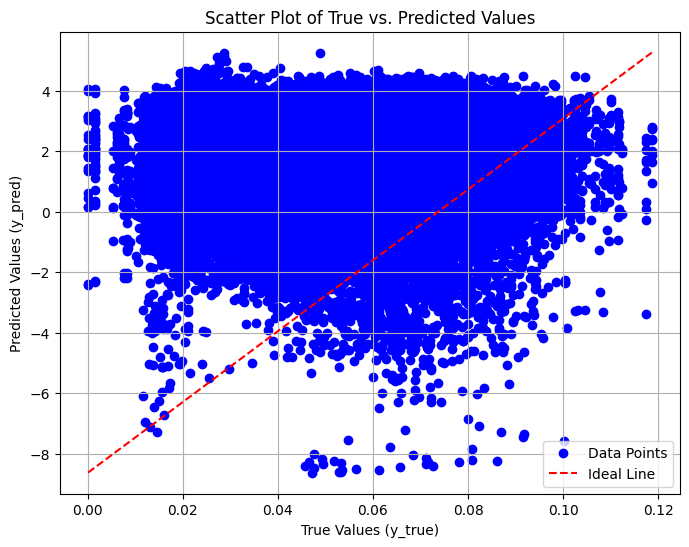

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace with your actual y_true and y_pred)
y_true_array = np.array(y_true)
y_pred_array = np.array(y_pred)

# Create a scatter plot
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
plt.scatter(y_true_array, y_pred_array, c='b', label='Data Points')
plt.plot([y_true_array.min(), y_true_array.max()], [y_pred_array.min(), y_pred_array.max()], 'r--', label='Ideal Line')  # Add a diagonal line for reference
plt.xlabel('True Values (y_true)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Scatter Plot of True vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


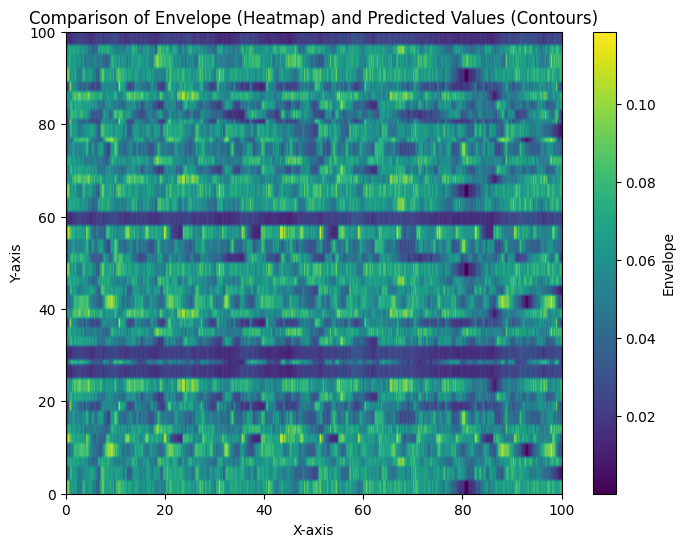

In [74]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
# Create 2D arrays for the envelope and predicted values
y_envelope = np.array(y_true)  # Replace with your envelope data
y_pred = np.array(y_pred)  # Replace with your predicted data

# Create a heatmap to compare the envelope and predicted values
plt.figure(figsize=(8,6))  # Adjust the figure size if needed

# Plot the envelope as a heatmap
plt.imshow(y_envelope, cmap='viridis', origin='lower', aspect='auto', extent=[0, 100, 0, 100])

# Overlay the predicted values as contour lines
# contour_levels = np.linspace(y_pred.min(), y_pred.max(), 10)  # Adjust the number of levels as needed
# contour = plt.contour(y_pred, levels=contour_levels, colors='red', extent=[0, 10, 0, 10])

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Comparison of Envelope (Heatmap) and Predicted Values (Contours)')
plt.colorbar(label='Envelope')
# plt.clabel(contour, contour_levels, inline=True, fmt='%1.2f', colors='red')

plt.show()
